In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# train dataset
df = pd.read_csv("FMCG_data.csv")

# test dataset
df_test = pd.read_csv("FMCG_data.csv")

In [4]:
df

,Date,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,01-01-2023,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0.0,A,5.0,15.0,17115.0
1,01-01-2023,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0.0,A,3.0,17.0,5074.0
2,01-01-2023,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0.0,A,6.0,22.0,23137.0
3,01-01-2023,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1.0,A+,3.0,27.0,22115.0
4,01-01-2023,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349996,01-02-2024,WH_124996,EID_74996,Rural,Mid,West,Zone 2,4,7,1,...,1,130,39.0,2005.0,23,0.0,B,21.0,36.0,37853.0
349997,01-02-2024,WH_124997,EID_74997,Urban,Large,South,Zone 5,12,4,0,...,1,147,27.0,2012.0,12,1.0,A,30.0,55.0,65888.0
349998,01-02-2024,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,4,10,...,1,60,44.0,NaN,24,0.0,B,17.0,38.0,38534.0
349999,01-02-2024,WH_124999,EID_74999,Rural,Mid,West,Zone 4,3,3,4,...,1,239,57.0,NaN,22,0.0,B+,16.0,41.0,58351.0


In [5]:

df.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
storage_issue_reported             73
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
Date                               14
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [6]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID','Date'], inplace = True)

In [7]:
df['workers_num'].median()

37.0

In [8]:
df['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [9]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

Location_type                        0
WH_capacity_size                     0
zone                                 0
WH_regional_zone                     0
Refill_Requests                      0
transport_issue                      0
No_of_Competitor                     0
No_of_retailers                      0
Warehouse_Ownership                  0
Number_of_distributors               0
flood_impacted                       0
flood_proof                          0
electric_supply                      0
dist_from_hub                        0
workers_num                        990
wh_est_year                     166335
storage_issue_reported               0
temp_reg_mach                        1
approved_wh_govt_certificate         0
wh_breakdown                         1
govt_check                           1
product_wg_ton                       1
dtype: int64

In [11]:
df.nunique().sort_values(ascending= True)

Location_type                       2
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
flood_impacted                      2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
approved_wh_govt_certificate        6
No_of_Competitor                   23
transport_issue                    23
Refill_Requests                    27
wh_est_year                        28
wh_breakdown                       47
govt_check                         70
storage_issue_reported             73
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [12]:
for i in df.columns[df.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df[i].unique()))
    print(df[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    321398
Urban     28603
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [13]:
def count_outliers(df):
    outliers={}
    for i in df.columns:
        if pd.api.types.is_numeric_dtype(df[i]):
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df[(df[i] < lower) | (df[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [14]:
outlier_counts = count_outliers(df)
outlier_counts

{'Refill_Requests': 4159,
 'transport_issue': 3852,
 'No_of_Competitor': 16980,
 'No_of_retailers': 7980,
 'Number_of_distributors': 494,
 'flood_impacted': 34356,
 'flood_proof': 19125,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 8332,
 'wh_est_year': 0,
 'storage_issue_reported': 932,
 'temp_reg_mach': 0,
 'wh_breakdown': 436,
 'govt_check': 114,
 'product_wg_ton': 1327}

In [15]:
df['product_wg_ton'].corr(df['flood_proof'])

-0.0013781060322405482

In [16]:
df['product_wg_ton'].corr(df['flood_impacted'])

-0.0022768441325800573

In [17]:
df.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [18]:
def remove_outliers(df):
    num_df = df.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df.loc[df_no_outliers.index]

In [19]:
df = remove_outliers(df)
df.shape

(161071, 20)

In [20]:
df_test.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
storage_issue_reported             73
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
Date                               14
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [21]:
df_test.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [22]:
print(len(df_test[df_test.duplicated]))

0


In [23]:
# print percentage of null values in each column

null_values_features = [i for i in df_test.columns if df_test[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df_test[i].isnull().mean()*100, 2), "% missing values")

workers_num 0.28 % missing values
wh_est_year 47.52 % missing values
approved_wh_govt_certificate 3.63 % missing values


In [24]:

df_test.drop(columns=['wh_est_year'], inplace = True)

In [25]:
df_test['workers_num'].median()

37.0

In [26]:
df_test['workers_num'].fillna(df_test['workers_num'].median(), inplace=True)

In [27]:
df_test['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [28]:
df_test['approved_wh_govt_certificate'].fillna(df_test['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [29]:
df_test.isnull().sum()

Date                            0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
Refill_Requests                 0
transport_issue                 0
No_of_Competitor                0
No_of_retailers                 0
Warehouse_Ownership             0
Number_of_distributors          0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported          0
temp_reg_mach                   1
approved_wh_govt_certificate    0
wh_breakdown                    1
govt_check                      1
product_wg_ton                  1
dtype: int64

In [30]:
df_test.nunique().sort_values(ascending= True)

temp_reg_mach                       2
Location_type                       2
electric_supply                     2
flood_proof                         2
flood_impacted                      2
Warehouse_Ownership                 2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
approved_wh_govt_certificate        6
Date                               14
No_of_Competitor                   23
transport_issue                    23
Refill_Requests                    27
wh_breakdown                       47
govt_check                         70
storage_issue_reported             73
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [31]:
for i in df_test.columns[df_test.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df_test[i].unique()))
    print(df_test[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    321398
Urban     28603
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [32]:
df_test['product_wg_ton'].corr(df_test['storage_issue_reported'])

0.6887753290004746

In [33]:
df_test.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [34]:
def remove_outliers(df_test):
    num_df = df_test.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df_test.loc[df_no_outliers.index]

In [35]:
df_test = remove_outliers(df_test)

In [36]:
df_test.shape

(308322, 20)

In [37]:
df_test.columns

Index(['Date', 'Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'Refill_Requests', 'transport_issue', 'No_of_Competitor',
       'No_of_retailers', 'Warehouse_Ownership', 'Number_of_distributors',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown', 'govt_check',
       'product_wg_ton'],
      dtype='object')

In [38]:
# Numerical columns & categorical columns in train dataset

num_columns_train=[i for i in df.columns if df[i].dtypes != 'O']
cat_columns_train=[i for i in df.columns if df[i].dtypes == 'O']

# Numerical columns & categorical columns in test dataset

num_columns_test=[i for i in df_test.columns if df_test[i].dtypes != 'O']
cat_columns_test=[i for i in df_test.columns if df_test[i].dtypes == 'O']


In [39]:
for i in cat_columns_train:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_columns_test:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

In [40]:
# display number of unique values in each column
df.nunique().sort_values(ascending=False)

product_wg_ton                  54049
No_of_retailers                  6267
dist_from_hub                     217
Number_of_distributors            115
govt_check                         63
workers_num                        60
storage_issue_reported             57
wh_breakdown                       38
wh_est_year                        28
Refill_Requests                    15
transport_issue                    11
No_of_Competitor                   10
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [41]:
columns_with_more_than_two_unique_values_train = df.columns[df.nunique()>2]

In [42]:
columns_with_more_than_two_unique_values_test = df_test.columns[df_test.nunique()>2]

In [43]:

X_train = df.drop(['product_wg_ton','wh_est_year', 'WH_regional_zone'], axis=1)
Y_train = df['product_wg_ton']

In [44]:
X_train.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'Refill_Requests',
       'transport_issue', 'No_of_Competitor', 'No_of_retailers',
       'Warehouse_Ownership', 'Number_of_distributors', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown',
       'govt_check'],
      dtype='object')

In [45]:
X_test = df_test.drop(['product_wg_ton','WH_regional_zone','Date'], axis=1)


In [46]:
X_test.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'Refill_Requests',
       'transport_issue', 'No_of_Competitor', 'No_of_retailers',
       'Warehouse_Ownership', 'Number_of_distributors', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown',
       'govt_check'],
      dtype='object')

In [47]:
LRmodel = LinearRegression()

In [48]:

LRmodel.fit(X_train, Y_train)

LinearRegression()

In [49]:
LR_predicted = LRmodel.predict(X_test)

In [50]:
LR_predicted

array([19980.323493  , 11659.06390159, 26112.3966083 , ...,
       36649.42276116, 35867.24242118, 33085.05711565])

In [51]:
LR_predicted.shape

(308322,)

In [52]:
X_test.shape

(308322, 17)

In [53]:
predictions_1 = pd.DataFrame(LR_predicted, columns =['product_wg_ton_pred']) 
predictions_1

,product_wg_ton_pred
0,19980.323493
1,11659.063902
2,26112.396608
3,24292.042436
4,22339.000891
...,...
308317,30741.944432
308318,39089.533537
308319,36649.422761
308320,35867.242421


In [54]:
predictions_1.to_csv('predictions_1.csv', index=False)

In [55]:
X_test.to_csv('X_test.csv', index=False)

In [56]:
# with changes in Location and approved certificates 

In [57]:
import pandas as pd

In [58]:
df2 = pd.read_csv("WH_opt_pred.csv")

In [59]:
df2

,Location_type,WH_capacity_size,zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton_pred
0,1,2,3,3,1,2,4651,1,24,1,91,29,13,0,1,5,15,19980.32349
1,0,0,1,0,0,4,6217,0,47,1,210,31,4,0,1,3,17,11659.06390
2,0,1,2,1,0,4,4306,0,64,0,161,37,17,0,1,6,22,26112.39661
3,0,1,1,7,4,2,6000,1,50,0,103,21,17,1,2,3,27,24292.04244
4,0,0,1,3,1,2,4740,0,42,1,112,25,18,0,5,6,24,22339.00089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308317,0,2,1,11,0,7,6256,1,68,1,142,62,8,0,4,28,38,30741.94443
308318,0,1,3,4,7,1,5332,0,85,1,130,39,23,0,3,21,36,39089.53354
308319,1,0,2,12,4,0,4044,1,65,1,147,27,12,1,1,30,55,36649.42276
308320,0,1,3,3,3,4,4988,0,56,1,239,57,22,0,4,16,41,35867.24242


In [60]:
df2['approved_wh_govt_certificate'] = df2['approved_wh_govt_certificate'].replace([5,3], [3, 2])
df2

,Location_type,WH_capacity_size,zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton_pred
0,1,2,3,3,1,2,4651,1,24,1,91,29,13,0,1,5,15,19980.32349
1,0,0,1,0,0,4,6217,0,47,1,210,31,4,0,1,3,17,11659.06390
2,0,1,2,1,0,4,4306,0,64,0,161,37,17,0,1,6,22,26112.39661
3,0,1,1,7,4,2,6000,1,50,0,103,21,17,1,2,3,27,24292.04244
4,0,0,1,3,1,2,4740,0,42,1,112,25,18,0,3,6,24,22339.00089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308317,0,2,1,11,0,7,6256,1,68,1,142,62,8,0,4,28,38,30741.94443
308318,0,1,3,4,7,1,5332,0,85,1,130,39,23,0,2,21,36,39089.53354
308319,1,0,2,12,4,0,4044,1,65,1,147,27,12,1,1,30,55,36649.42276
308320,0,1,3,3,3,4,4988,0,56,1,239,57,22,0,4,16,41,35867.24242


In [61]:
df2.to_csv('newdata.csv', index=False)

In [62]:
# train dataset
df0 = pd.read_csv("newdata.csv")
df0


,Location_type,WH_capacity_size,zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton_pred
0,1,2,3,3,1,2,4651,1,24,1,91,29,13,0,1,5,15,19980.32349
1,0,0,1,0,0,4,6217,0,47,1,210,31,4,0,1,3,17,11659.06390
2,0,1,2,1,0,4,4306,0,64,0,161,37,17,0,1,6,22,26112.39661
3,0,1,1,7,4,2,6000,1,50,0,103,21,17,1,2,3,27,24292.04244
4,0,0,1,3,1,2,4740,0,42,1,112,25,18,0,3,6,24,22339.00089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308317,0,2,1,11,0,7,6256,1,68,1,142,62,8,0,4,28,38,30741.94443
308318,0,1,3,4,7,1,5332,0,85,1,130,39,23,0,2,21,36,39089.53354
308319,1,0,2,12,4,0,4044,1,65,1,147,27,12,1,1,30,55,36649.42276
308320,0,1,3,3,3,4,4988,0,56,1,239,57,22,0,4,16,41,35867.24242


In [63]:
df = pd.read_csv("newdata.csv")

# test dataset
df_test = pd.read_csv("newdata.csv")

In [64]:
df_test.shape

(308322, 18)

In [65]:
df.shape

(308322, 18)

In [66]:
X_train = df
Y_train = df['product_wg_ton_pred']

In [67]:
X_train.shape

(308322, 18)

In [68]:
Y_train.shape

(308322,)

In [69]:
X_test = df_test
Y_test = df_test['product_wg_ton_pred']

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [71]:
LRmodel = LinearRegression()

In [72]:

LRmodel.fit(X_train, Y_train)

LinearRegression()

In [73]:
LR_predicted = LRmodel.predict(X_test)
LR_predicted

array([19980.32349, 11659.0639 , 26112.39661, ..., 36649.42276,
       35867.24242, 33085.05712])

In [74]:
# r2 score
lr_r2 = r2_score(Y_test, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(Y_test, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


R2 score:   1.0
Root Mean Squared Error:   0.0
Mean Absolute Error:   0.0


In [ ]:
LR_predicted.to_csv('newdata.csv', index=False)

In [75]:
DTmodel = DecisionTreeRegressor(random_state = 0) 

In [76]:

DTmodel.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

In [77]:
DT_predicted = DTmodel.predict(X_test)

In [78]:
DT_predicted

array([19980.32349, 11659.0639 , 26112.39661, ..., 36649.42276,
       35867.24242, 33085.05712])

In [79]:
# r2 score
dt_r2 = r2_score(Y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(Y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(Y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)


R2 score:   1.0
Root Mean Squared Error:   0.0
Mean Absolute Error:   0.0


In [80]:
RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 

In [81]:
RFmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [82]:
RF_predicted = RFmodel.predict(X_test)
RF_predicted

array([18775.42270551,  9258.86252798, 25375.18852248, ...,
       36289.62799574, 36289.62799574, 33601.07803858])

In [83]:

# r2 score
rf_r2 = r2_score(Y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(Y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)

R2 score:   0.993
Root Mean Squared Error:   989.846
Mean Absolute Error:   800.295


In [84]:

GBmodel = GradientBoostingRegressor()

In [85]:
GBmodel.fit(X_train,Y_train)

GradientBoostingRegressor()

In [86]:
GB_predicted = GBmodel.predict(X_test)

In [87]:
gb_r2 = r2_score(Y_test, GB_predicted).round(3)
print('R2 score:  ', gb_r2)

# root mean squared error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(Y_test, GB_predicted)).round(3)
print('Root Mean Squared Error:  ', gb_rmse) 

# mean absolute error (MAE)
gb_mae = mean_absolute_error(Y_test, GB_predicted).round(3)
print('Mean Absolute Error:  ', gb_mae)

R2 score:   1.0
Root Mean Squared Error:   107.307
Mean Absolute Error:   81.884


Text(0, 0.5, 'Predicted Values')

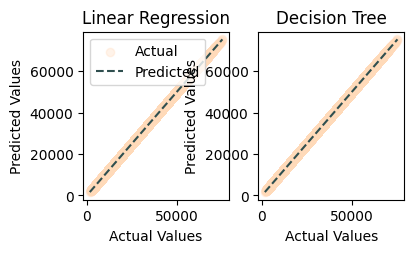

In [88]:
ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_predicted, color='#ffdab9', alpha=0.3, label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(Y_test, DT_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')



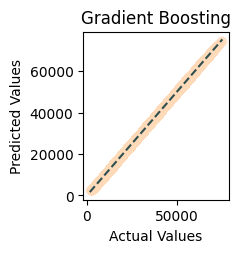

In [89]:
ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()